In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz
from pathlib import Path

In [4]:
segment_id = 864691135510518224

In [59]:
import minfig

# Load the appropriate volume data inferface object

In [5]:
from neurd.vdi_microns import volume_data_interface as vdi
#vdi.set_parameters_for_directory_modules()

In [6]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/864691135510518224_synapses.csv'

In [7]:
from datasci_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,prepost,synapse_id,synapse_x,synapse_y,synapse_z,synapse_size,segment_id
0,presyn,483766883,372182,155486,27762,4384,864691135510518224
1,presyn,478550136,371370,156720,27781,2068,864691135510518224
2,presyn,480939462,370330,141276,27795,11064,864691135510518224
3,presyn,479220146,370697,150480,26371,8636,864691135510518224
4,presyn,468794187,363722,154550,27349,3516,864691135510518224
...,...,...,...,...,...,...,...
960,postsyn,483712349,375430,152370,26897,17880,864691135510518224
961,postsyn,492052366,381210,155648,26422,8680,864691135510518224
962,postsyn,486032429,373180,142870,25738,2244,864691135510518224
963,postsyn,477362400,369214,146406,27836,18312,864691135510518224


In [8]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [9]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>

In [10]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [11]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [12]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [21]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 7199 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_70516.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_70516_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/decimation_meshlab_25243854.mls


In [22]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135510518224,
  },
}



# Step 2: Soma Identification

In [23]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [24]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [25]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

# soma_indentification

In [26]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 9821 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_2210.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_2210_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/remove_interior_324586.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_2210.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_2210_remove_interior.off
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.769893]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 3940 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_226702.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_226702_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/poisson_330866.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_226702.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_226702_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/poisson_330866.mls is being deleted....
Inside sphere validater: ratio_va

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.781901, 0.3351845]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2985 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_958718.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_958718_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/poisson_694356.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_958718.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_958718_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/poisson_694356.mls is being deleted....
Inside sphere validate

  0%|          | 0/9 [00:00<?, ?it/s]

Largest hole before segmentation = 84198.44608552229, after = 79686.03659527568,

ratio = 0.9464074493053798, difference = -4512.409490246602
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 4774 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_45064.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_45064_fill_holes.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/fill_holes_42786.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_45064.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_45064_fill_holes.off
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/fill_holes_42786.mls is being deleted....


  0%|          | 0/2 [00:00<?, ?it/s]

No split meshes were above the width threshold (0.32) and size threshold (2000) so continuing
So just going with old somas
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>
 <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Not need to do a second pass because already found a soma


In [27]:
soma_products.soma_run_time

80.4653627872467

In [28]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 2
# of glia = 0
# of nuclei = 18


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [29]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135510518224,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.

# Step 2b: Saving off pipeline products

In [30]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/products_up_to_soma_stage.pkl
File size is 4.586327 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>:140359778656848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>:140359778660208
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>:140359778778320
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>:140359778748880
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>:140359778703152
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>:140359778704688
Cleared mesh: <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>:140359778748112
Cleared mesh: <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>:140359778776304
Cleared mesh: <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3)

# Step 3: Decomposition

In [31]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(11386, 3), faces.shape=(22560, 3))>, <trimesh.Trimesh(vertices.shape=(5708, 3), faces.shape=(10517, 3))>]
soma_mesh_list_centers = [array([1488880.76058317,  589300.09373793, 1100652.31345512]), array([1472182.71408549,  577993.08644009, 1112354.27575333])]
Getting Glia and Nuclei Pieces Subtracted Away 0.11085295677185059
 Splitting mesh after soma cancellation 1.5267438888549805
# of split_meshes = 4
 Containing Mesh Indices 0.01568436622619629
containing_mesh_indices = {0: 0, 1: 0}
 non_soma_touching_meshes 1.1920928955078125e-05
There were 3 pieces found 

  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/33579 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.13it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.5797045230865479
connecting at the root
branches_touching_root = [6]
combining close nodes
combine_threshold = 700
length of Graph = 3258
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.002908632942517017


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Decomposing first pass: 3.9671502113342285
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [635, 7668]
mesh_large_connectivity: 0.002733469009399414
Finding MAP candidates connected components: 0.0001087188720703125
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.12482404708862305
Grouping MP Sublimbs by Graph: 0.03435802459716797
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.03310132026672363
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2974 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/Tuto

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02274322509765625
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.91109824180603
Checking connected components after removing cycles
Total time for mesh KDTree = 0.11360836029052734
sbv[0].reshape(-1,3) = [[1487208.   596715.8 1099876. ]]
closest_sk_pt_coord BEFORE = [1487610.  597302. 1100690.]
current_skeleton.shape = (298, 2, 3)
node_for_stitch = 213: [1487610.  597302. 1100690.]
node_for_stitch AFTER = 213: [1487610.  597302. 1100690.]
possible_node_loc = [  0  46 213 298]
possible_node_loc AFTER = [  0  46 213 298]
curr_shortest_path = [213]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1487610.  597302. 1100690.]
skipping soma 0 because closest skeleton node was already end node
endpoints_must_keep = {0: array([[1487610.,  597302., 110069

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (282, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 10.441060781478882
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5840 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_60647.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_60647_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/remove_interior_208693.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_60647.off
removed temporary output file: /neurd_

0it [00:00, ?it/s]

Total time for decomposition = 1.5842158794403076
mesh_correspondence_first_pass: 1.5842444896697998
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (282, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (282, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.15717210646754184
 conflict_indices % = 0.0267373238588462


  0%|          | 0/15 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.619128704071045
correspondence_1_to_1: 0.5607032775878906
Total time for MAP sublimb processing 12.619202136993408
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.01801586151123047
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02376699447631836
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.02393341064453125
Do Not Need to Fix MP Decomposition 2 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1491450.08344721  608267.60149996 1098228.13300974]
MP_branches_with_stitch_point = [0, 1]
MAP_branches

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.181581376945397
 conflict_indices % = 0.010089686098654708


  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1476472.93997195  615033.74821465 1108138.04148317]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1932247985528696
 conflict_indices % = 0.00328893274132544


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.18761437364831143
 conflict_indices % = 0.04649808684079188


  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1488771.89112037  605282.82224157 1100475.99894991]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16261682242990655
 conflict_indices % = 0.006853582554517134


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.23327278231910384
 conflict_indices % = 0.013472600666061157


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 



Time for decomp of Limb = 31.563374042510986
Number of matching vertices = 26
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/10 [00:00<?, ?it/s]

66697 66698
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1484150.   588282.7 1095391. ]
Time for preparing soma vertices and root: 0.0003159046173095703
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20269 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.08it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.595952033996582
branches_touching_root = [3]
combining close nodes
combine_threshold = 700
length of Graph = 5975
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 25
empty_indices % = 0.0
 conflict_indices % = 0.010165121237665492


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Decomposing first pass: 3.8201568126678467
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.078315734863281e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1457672119140625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.0687553882598877
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1483982.08022895  588135.81137922 1094821.63000965]
current_skeleton.shape = (556, 2, 3)
node_for_stitch = 556: [1483982.08022895  588135.81137922 1094821.63000965]
node_for_stitch AFTER = 556: [1483982.08022895  588135.81137922 1094821.63000965]
possible_node_loc = [  2 556]
possible_node_loc AFTER = [  2 556]
curr_shortest_path = [556]
Current stitch point was a branch or endpoi

  0%|          | 0/25 [00:00<?, ?it/s]

40338 40339
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1476534.   581771.6 1109552. ]
Time for preparing soma vertices and root: 0.0002739429473876953
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/20030 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.75it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3622252941131592
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 2074
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.002637462007987742


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 1.8479225635528564
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2096]
mesh_large_connectivity: 0.0001461505889892578
Finding MAP candidates connected components: 0.00012040138244628906
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.08075356483459473
Grouping MP Sublimbs by Graph: 0.020871877670288086
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.014909029006958008
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9375 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/Tuto

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.011828184127807617
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.200299501419067
Checking connected components after removing cycles
Total time for mesh KDTree = 0.027730941772460938
sbv[0].reshape(-1,3) = [[1476534.   581771.6 1109552. ]]
closest_sk_pt_coord BEFORE = [1476790.  582533. 1109340.]
current_skeleton.shape = (73, 2, 3)
node_for_stitch = 0: [1476790.  582533. 1109340.]
node_for_stitch AFTER = 0: [1476790.  582533. 1109340.]
possible_node_loc = [ 0 73]
possible_node_loc AFTER = [ 0 73]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1476790.  582533. 1109340.]
skipping soma 1 because closest skeleton node was already end node
endpoints_must_keep = {1: array([[1476790.,  582533., 1109340.]])}
    Total time fo

0it [00:00, ?it/s]

Total time for decomposition = 0.8762342929840088
mesh_correspondence_first_pass: 0.8762693405151367
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (73, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (73, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.14790076335877864
 conflict_indices % = 0.0


  0%|          | 0/4 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 8.602232456207275
correspondence_1_to_1: 0.24622416496276855
Total time for MAP sublimb processing 8.602423667907715
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.018487215042114258
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1481900.72163354  586937.6302398  1100472.34094648]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21200170807063373
 conflict_indices % = 0.008992489512948683


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 19.26541781425476
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

39810 39811
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1474851.   571357.5 1113536. ]
Time for preparing soma vertices and root: 0.0002772808074951172
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11304 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.76it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.31123900413513184
connecting at the root
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 1216
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0026850443032310034


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Decomposing first pass: 1.041837453842163
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.222724914550781e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.266334533691406e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.11864519119262695
sbv[0].reshape(-1,3) = [[1474851.   571357.5 1113536. ]]
closest_sk_pt_coord BEFORE = [1478327.0746533   571496.39513115 1112568.79431172]
current_skeleton.shape = (816, 2, 3)
node_for_stitch = 79: [1478327.0746533   571496.39513115 1112568.79431172]
node_for_stitch AFTER = 79: [1478327.0746533   571496.39513115 1112568.79431172]
possible_node_loc = [  0 816]
possible_node_loc AFTER = [  0 816]
curr_shortest_path = [79, 78.0, 77.0, 76.0, 75.0, 74.0, 73.0, 72.0, 71.0, 

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2050141285396501
 conflict_indices % = 0.0


  0%|          | 0/50 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 87.54837315201391
curr_width_median = 443.6986529716527
curr_width_median = 382.8344517011344
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 3.440927743911743
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 4.84467887878418
Number of matching vertices = 18
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

22345 22346
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1493560.   586779.1 1105606. ]
Time for preparing soma vertices and root: 0.00022864341735839844
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10788 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.17it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.28505539894104004
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 741
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.8355777263641357
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [20742]
mesh_large_connectivity: 0.00012373924255371094
Finding MAP candidates connected components: 6.771087646484375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.006146907806396484
Grouping MP Sublimbs by Graph: 2.47955322265625e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.055608272552490234
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3455 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/Tuto

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.03681373596191406
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 19.203087091445923
Checking connected components after removing cycles
Total time for mesh KDTree = 0.16228199005126953
sbv[0].reshape(-1,3) = [[1493560.   586779.1 1105606. ]]
closest_sk_pt_coord BEFORE = [1492700.  587118. 1106560.]
current_skeleton.shape = (775, 2, 3)
node_for_stitch = 201: [1492700.  587118. 1106560.]
node_for_stitch AFTER = 201: [1492700.  587118. 1106560.]
possible_node_loc = [  0  48 131 149 178 201 320 431 589 599 604 636 733 745 775]
possible_node_loc AFTER = [  0  48 131 149 178 201 320 431 589 599 604 636 733 745 775]
curr_shortest_path = [201]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1492700.  587118. 1106560.]
skipping soma 0 because closest skele

  0%|          | 0/10 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (711, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 20.632468223571777
Working on limb correspondence for #0 MAP piece
xvfb-run -n 9349 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_67535.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_67535_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/remove_interior_650371.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_67535.off
removed temporary output file: /neurd_

0it [00:00, ?it/s]

Total time for decomposition = 3.2867374420166016
mesh_correspondence_first_pass: 3.2867743968963623
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (711, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (711, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.16565422813614888
 conflict_indices % = 0.059782084659145696


  0%|          | 0/60 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 27.05527424812317
correspondence_1_to_1: 3.0803794860839844
Total time for MAP sublimb processing 27.055338144302368
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 28.21123456954956
Number of matching vertices = 60
Number of matching vertices = 13
Only one endpoint after filtering away the endpoints that are not on the skeleton
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/7 [00:00<?, ?it/s]

20741 20742
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1486653.   594244.2 1104480. ]
Time for preparing soma vertices and root: 0.0002682209014892578
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9843 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.23it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.24029326438903809
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 818
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.8413674831390381
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.5789947509765625e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2411346435546875e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.14896845817565918
sbv[0].reshape(-1,3) = [[1486653.   594244.2 1104480. ]]
closest_sk_pt_coord BEFORE = [1486547.7606223   594609.92820407 1104601.87572914]
current_skeleton.shape = (817, 2, 3)
node_for_stitch = 817: [1486547.7606223   594609.92820407 1104601.87572914]
node_for_stitch AFTER = 817: [1486547.7606223   594609.92820407 1104601.87572914]
possible_node_loc = [334 817]
possible_node_loc AFTER = [334 817]
curr_shortest_path = [817]
Current stitch point was a branch or endp

  0%|          | 0/1 [00:00<?, ?it/s]

19361 19362
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 6 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1491272.  582425. 1102199.]
Time for preparing soma vertices and root: 0.00045371055603027344
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7350 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.84it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.22639918327331543
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 734
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.6837105751037598
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.124641418457031e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.288818359375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.16396784782409668
sbv[0].reshape(-1,3) = [[1491272.  582425. 1102199.]]
closest_sk_pt_coord BEFORE = [1491378.93502276  582020.70946596 1101822.28585048]
current_skeleton.shape = (733, 2, 3)
node_for_stitch = 1: [1491378.93502276  582020.70946596 1101822.28585048]
node_for_stitch AFTER = 1: [1491378.93502276  582020.70946596 1101822.28585048]
possible_node_loc = [  0 708]
possible_node_loc AFTER = [  0 708]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpoint, 

  0%|          | 0/1 [00:00<?, ?it/s]

14575 14576
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 7 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1468936.   574693.8 1112623. ]
Time for preparing soma vertices and root: 0.00033926963806152344
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2055 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.74it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.13283276557922363
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 117


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.2111971378326416
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [3349]
mesh_large_connectivity: 0.000156402587890625
Finding MAP candidates connected components: 7.867813110351562e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.002213001251220703
Grouping MP Sublimbs by Graph: 2.6226043701171875e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.015459537506103516
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1362 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/None_poisson.off -s /neurd_packages/NEURD/Applications/Tuto

0it [00:00, ?it/s]

len(leftover_meshes_sig) = [<trimesh.Trimesh(vertices.shape=(886, 3), faces.shape=(1416, 3))>, <trimesh.Trimesh(vertices.shape=(874, 3), faces.shape=(1368, 3))>]


  0%|          | 0/2 [00:00<?, ?it/s]

invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/885 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.90it/s]

Time for sk_meshparty_obj = 0.06105685234069824
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 58
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
Time for correspondence = 0.12773871421813965
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/873 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.46it/s]


Time for sk_meshparty_obj = 0.04293370246887207
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 60
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [3659.67567888]
width_median= 3659.6756788774537
Time for correspondence = 0.11447882652282715
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.061882734298706055
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.892637014389038
Checking connected components after removing cycles
Total time for mesh KDTree = 0.039620399475097656
sbv[0].reshape(-1,3) = [[1468936.   574693.8 1112623. ]]
closest_sk_pt_coord BEFORE = [1466250.  578966. 1113240.]
current_skeleton.shape = (120, 2, 3)
node_for_stitch = 57: [1466250.  578966. 1113240.]
node_for_stitch AFTER = 57: [1466250.  578966. 1113240.]
possible_node_loc = [  0 111 120]
possible_node_loc AFTER = [  0 111 120]
curr_shortest_path = [57, 58.0, 59.0, 8.0, 6.0, 4.0, 2.0, 0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 2674.849250227899
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1466250.  578966. 1113240.]
Adding new branch to skeleton
border_average_c

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (117, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 13.206182956695557
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8530 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_49801.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_49801_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/remove_interior_33054.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/temp/neuron_49801.off
removed temporary output file: /neurd_p

0it [00:00, ?it/s]

Total time for decomposition = 1.0564241409301758
mesh_correspondence_first_pass: 1.0564544200897217
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (117, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (117, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.017915795759928337
 conflict_indices % = 0.32517169304269933


  0%|          | 0/3 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 14.714753866195679
correspondence_1_to_1: 0.4366447925567627
Total time for MAP sublimb processing 14.714833974838257
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 15.068565130233765
Number of matching vertices = 90
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

3348 3349
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 123.76592564582825


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(113, 3), faces.shape=(176, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 80.85it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029264450073242188
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [400.97706696]
width_median= 400.9770669601358
segment_widths_median = [400.97706696]
Decomposing first pass: 0.04911231994628906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.14984130859375e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.7670135498046875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08035922050476074


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15124058723449707
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(140, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.52it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029463529586791992
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 24
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [160.02948188]
width_median= 160.02948188374512
segment_widths_median = [160.02948188]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.41it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07314705848693848
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 34
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [160.06944042]
width_median= 160.06944041891722
segment_widths_median = [160.06944042]
Using the axon parameters
Decomposing first pass: 0.03856945037841797
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.288818359375e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1468644142150879
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

139 140
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.25049638748168945
Total time for stitching floating pieces = 3.7575526237487793
Total time for Concept Networks = 3.223949432373047
Total time for all mesh and skeletonization decomp = 140.3230791091919
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6224 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_861909.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_861909_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/poisson_376396.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/neuron_861909.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Double_Soma/Poisson_temp/n

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 100



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 92



  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 81



  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 188



  0%|          | 0/188 [00:00<?, ?it/s]

  0%|          | 0/188 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 149



  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 149



  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 105



  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 53



  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 81



  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 134



  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 120



  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 6
    No spines and using precomputed width: 596.3702191212011
Working on limb L0 branch 3
    current_width= 419.8851194387729
Working on limb L0 branch 7
    No spines and using precomputed width: 373.4935702682729
Working on limb L0 branch 0
    current_width= 261.67118520971894
Working on limb L0 branch 1
    current_width= 277.7069504096059
Working on limb L0 branch 2
    current_width= 291.4050787073831
Working on limb L0 branch 4
    current_width= 288.6045759028354
Working on limb L0 branch 8
    No spines and using precomputed width: 306.9056346954077
Working on limb L0 branch 5
    current_width= 245.05052314117177
Working on limb 

In [32]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

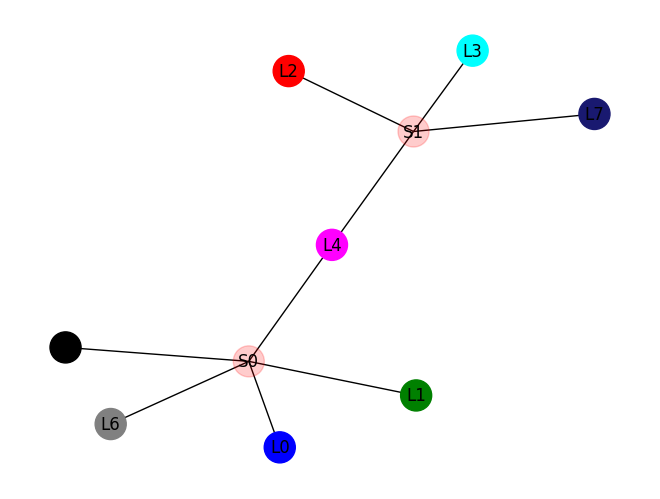

In [33]:
nviz.visualize_neuron_limbs(neuron_obj)

limb_name = L2

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L2 because was the limb in the first key


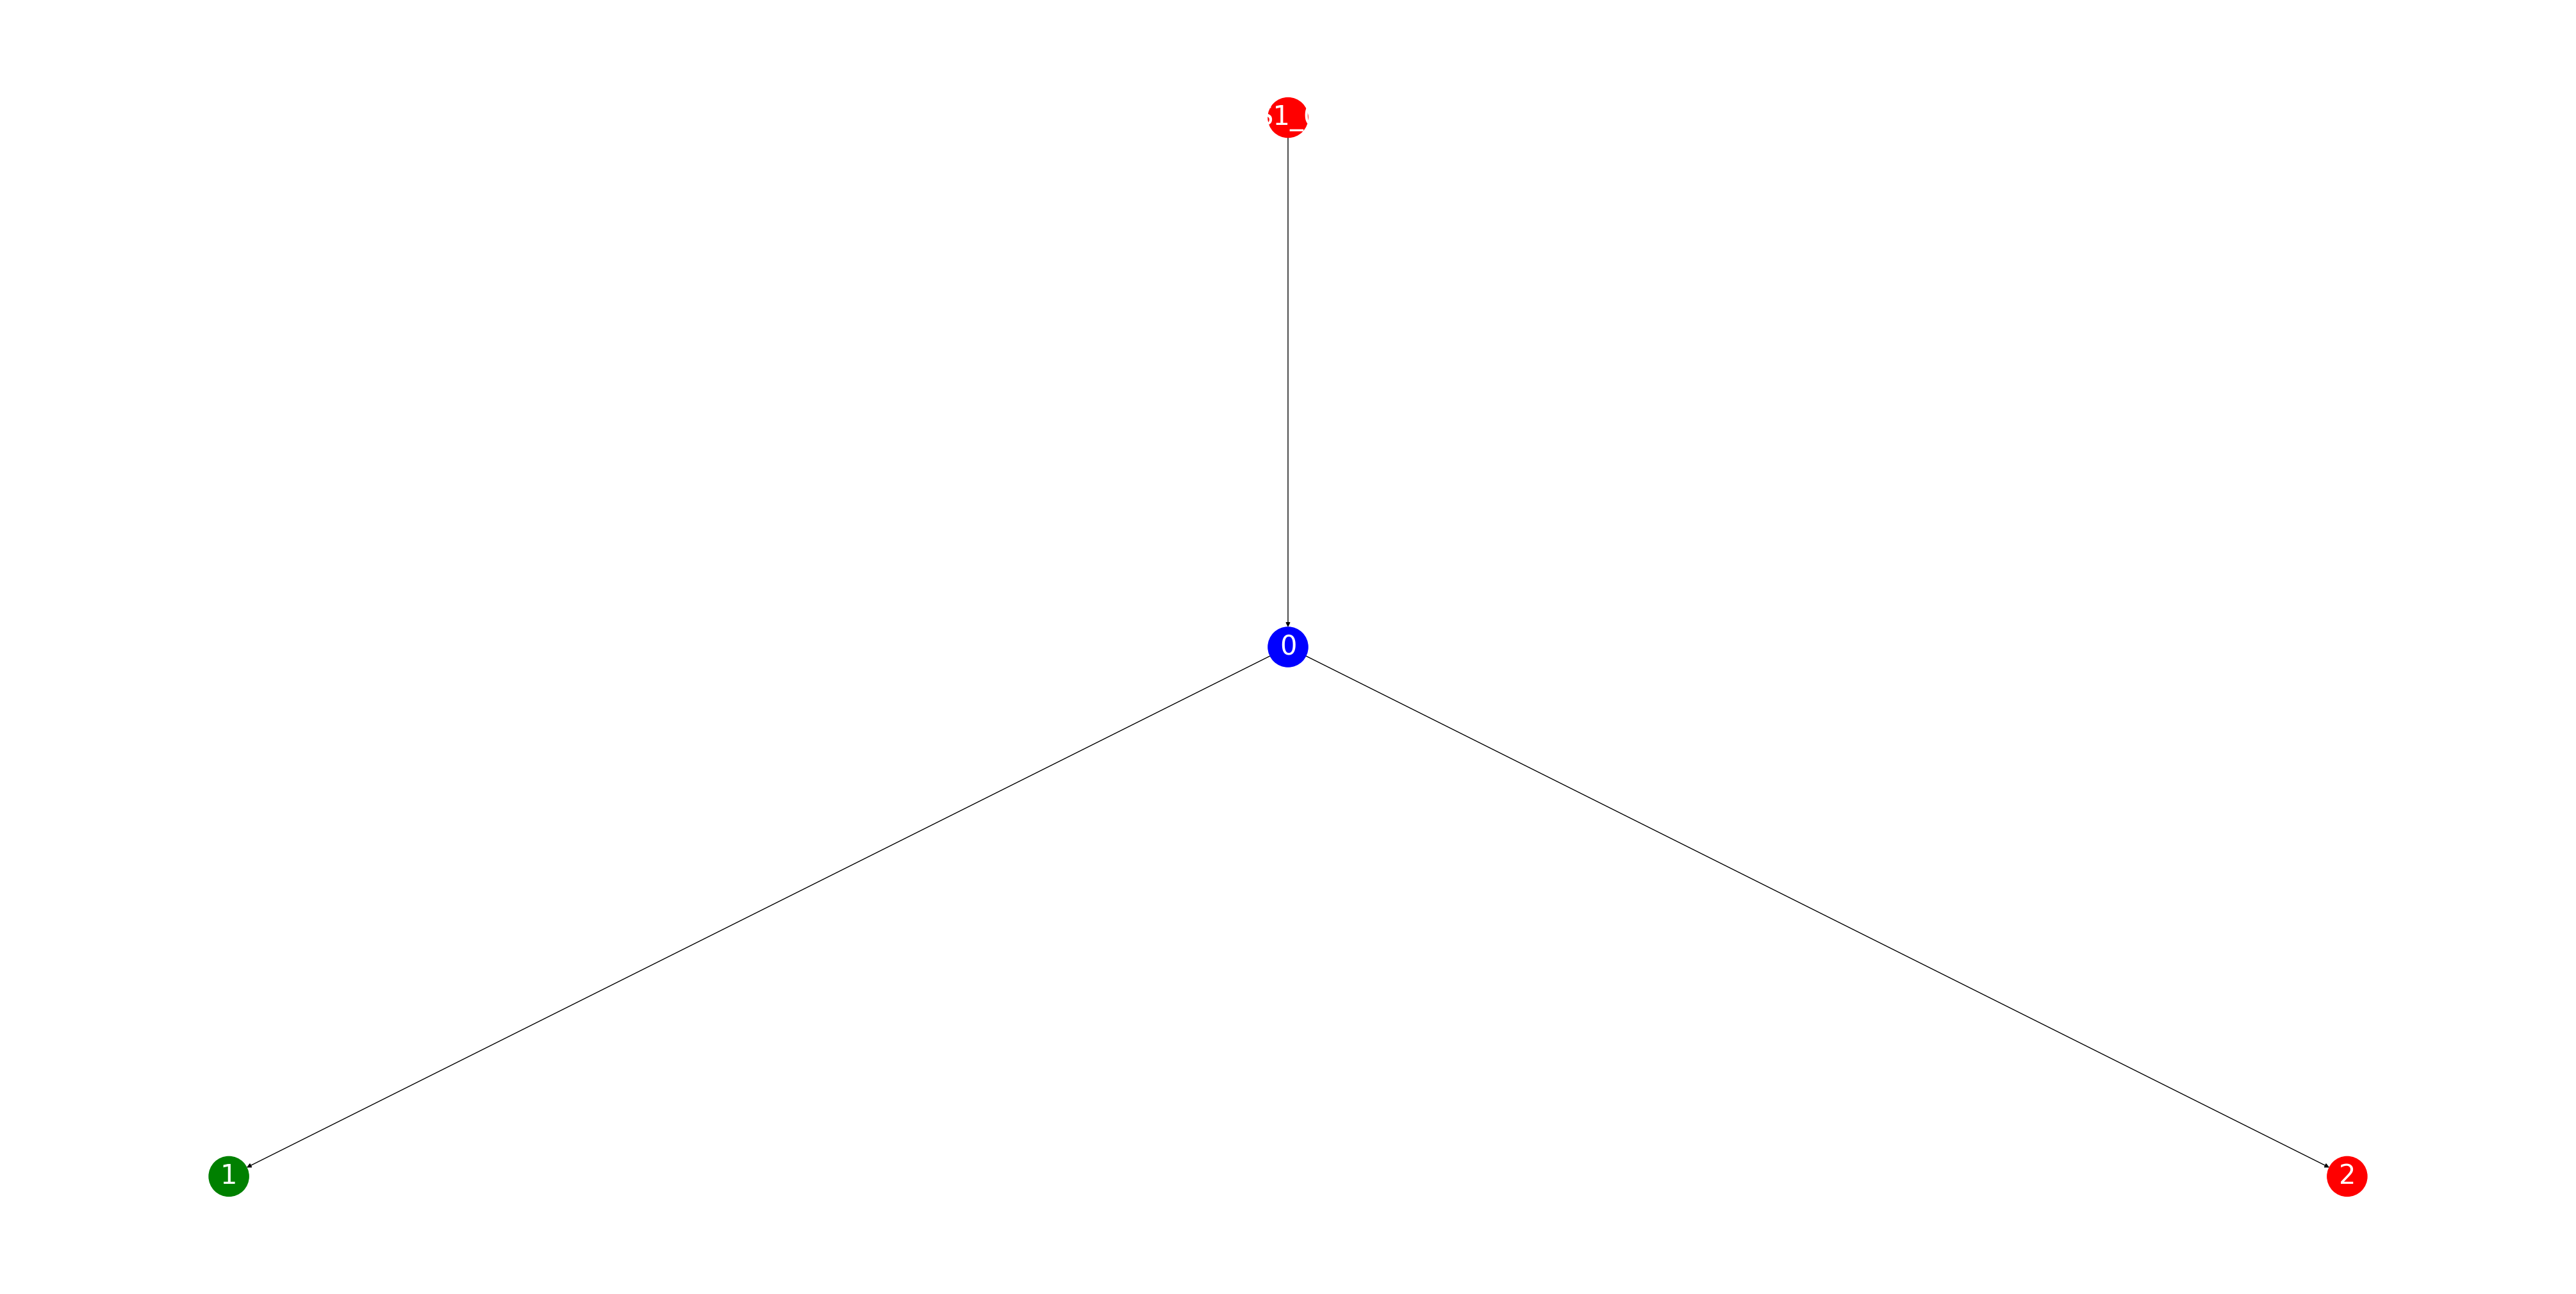

In [34]:
nviz.visualize_neuron_specific_limb(neuron_obj,"L2")

In [35]:
ipvu.plot_objects(neuron_obj[2][0].mesh)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [36]:
_ = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

In [37]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135510518224,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.


# Saving off neuron

In [38]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.23051047325134277
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.4672584533691406
Total time for limb_meshes compression = 0.9120883941650391
    Starting Limb Correspondence Compression


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 4.873746633529663
Cleared mesh: <trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>:140359778656848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>:140359778660208
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>:140359778778320
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>:140359778748880
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>:140359778703152
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>:140359778704688
Cleared mesh: <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>:140359778748112
Cleared mesh: <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>:140359778776304
Cleared mesh: <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>:140359778872720
Cleared mesh: <trimesh.Trimesh(vertices.shape=(612, 3), fa

'864691135510518224.pbz2'

In [39]:
nviz.visualize_neuron(neuron_obj,limb_branch_dict="all")


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [40]:
ipvu.plot_objects(neuron_obj.mesh)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Reloading the Neuron

In [41]:
neuron_obj = vdi.load_neuron_obj(
    segment_id = segment_id,
    mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [42]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135510518224,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.

# Step 4A: Multi Soma Split Suggestions

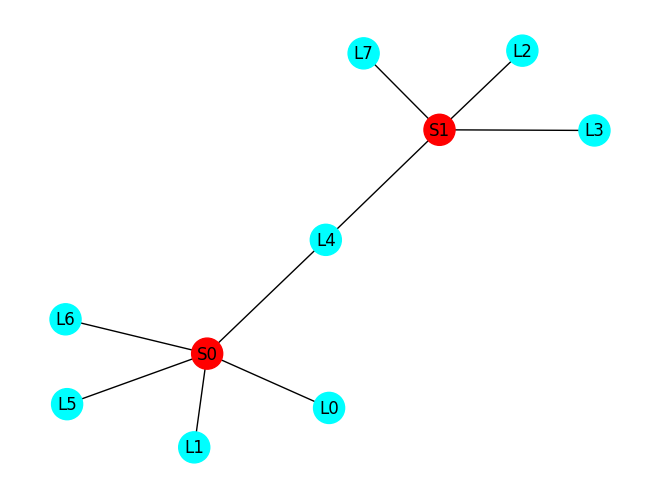

In [43]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [44]:
multi_soma_split_parameters = dict()

In [45]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

n_paths_multi_soma = 1
n_paths_multi_touch = 0
n_paths_cut = 1


-------- Suggestions for Limb 4------


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [46]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [47]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

In [48]:
ipvu.plot_objects(
    meshes = [
        neuron_list[0].mesh_from_branches,
        neuron_list[1].mesh_from_branches,
    ],
    meshes_colors=["red","blue"]
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [49]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691135510518224,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>, <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>, <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>, <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>, <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>, <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>, <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>, <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>, <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>, <trimesh.Trimesh(vertices.shape=(612, 3), faces.shape=(1378, 3))>, <trimesh.Trimesh(vertices.shape=(456, 3), faces.shape=(742, 3))>, <trimesh.Trimesh(vertices.shape=(344, 3), faces.

# Step 4b: Saving Split Neurons

In [50]:
vdi.save_neuron_obj(
    n1,
    suffix = "_split_0",
)

Total time for soma meshes compression = 0.2154693603515625
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.23215913772583008
Total time for limb_meshes compression = 0.8252573013305664
    Starting Limb Correspondence Compression


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 2.9658682346343994
Cleared mesh: <trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>:140359519322608
Cleared mesh: <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>:140359519671536
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>:140361073448704
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>:140357193678960
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>:140357193680448
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>:140357193683392
Cleared mesh: <trimesh.Trimesh(vertices.shape=(864, 3), faces.shape=(1989, 3))>:140357193684928
Cleared mesh: <trimesh.Trimesh(vertices.shape=(723, 3), faces.shape=(1611, 3))>:140357193686416
Cleared mesh: <trimesh.Trimesh(vertices.shape=(693, 3), faces.shape=(1561, 3))>:140357193692064
Cleared mesh: <trimesh.Trimesh(vertices.shape=(612, 3), f

'864691135510518224_split_0.pbz2'

# Step 4c: Decompressing Split Neuron

In [51]:
from neurd import neuron_utils as nru

neuron_obj_path = Path(f"./{segment_id}_split_0.pbz2")
neuron_obj_path.exists()

n1 = nru.decompress_neuron(
    filepath = neuron_obj_path,
    original_mesh = mesh, 
    suppress_output = False
)

Inside decompress neuron and decomposition_type = meshafterparty
Recieved trimesh as orignal mesh
Original mesh BEFORE using original_mesh_idx = <trimesh.Trimesh(vertices.shape=(154713, 3), faces.shape=(323535, 3))>
Original mesh AFTER using original_mesh_idx = <trimesh.Trimesh(vertices.shape=(90055, 3), faces.shape=(178430, 3))>
Passed faces original mesh check
Number of vertices in mesh used for compression (90058) does not match the number of vertices in mesh passed to decompress_neuron function (90055)
using precomputed soma_volume_ratios
Working on limb 0


  0%|          | 0/10 [00:00<?, ?it/s]

  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
  Working on branch 5
  Working on branch 6
  Working on branch 7
  Working on branch 8
  Working on branch 9
Working on limb 1


  0%|          | 0/27 [00:00<?, ?it/s]

  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
  Working on branch 5
  Working on branch 6
  Working on branch 7
  Working on branch 8
  Working on branch 9
  Working on branch 10
  Working on branch 11
  Working on branch 12
  Working on branch 13
  Working on branch 14
  Working on branch 15
  Working on branch 16
  Working on branch 17
  Working on branch 18
  Working on branch 19
  Working on branch 20
  Working on branch 21
  Working on branch 22
  Working on branch 23
  Working on branch 24
  Working on branch 25
Viable Non soma touching mesh(0): <trimesh.Trimesh(vertices.shape=(113, 3), faces.shape=(176, 3))> was not a match
  Working on branch 26
Working on limb 2


  0%|          | 0/5 [00:00<?, ?it/s]

  Working on branch 0
  Working on branch 1
  Working on branch 2
  Working on branch 3
  Working on branch 4
Working on limb 3


  0%|          | 0/1 [00:00<?, ?it/s]

  Working on branch 0
Working on limb 4


  0%|          | 0/1 [00:00<?, ?it/s]

  Working on branch 0
Already have preprocessed data
--- 1) Finished unpacking preprocessed materials: 0.00016736984252929688
total_edges = [['S0', 'L0'], ['S0', 'L1'], ['S0', 'L2'], ['S0', 'L3'], ['S0', 'L4']]
--- 2) Finished creating neuron connectivity graph: 0.00010013580322265625
Having to generate soma_meshes_face_idx because none in preprocessed data
--- 3a) Finshed generating soma_meshes_face_idx: 0.08711791038513184
Using precomputed volume ratio
--- 3b) Finished soma creation: 0.05251646041870117
--- 3) Finshed generating soma objects and adding them to concept graph: 4.029273986816406e-05
--- 4a) Finshed generating curr_limb_meshes_face_idx: 0.16586518287658691
curr_limb_concept_networks= {0: [<datasci_tools.networkx_utils.GraphOrderedEdges object at 0x7fa774a078e0>]}
curr_limb_concept_networks= {0: [<datasci_tools.networkx_utils.GraphOrderedEdges object at 0x7fa7749825e0>]}
curr_limb_concept_networks= {0: [<datasci_tools.networkx_utils.GraphOrderedEdges object at 0x7fa77498

# Step 5: Cell Typing

In [52]:
from neurd import neuron_pipeline_utils as npu

In [53]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 5


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.81it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.8399159908294678
branches_touching_root = [13]
combining close nodes
combine_threshold = 1300
length of Graph = 7906
After combining close endpoints max(kept_branches_idx) = 85, len(kept_branches_idx) = 75
empty_indices % = 0.0
 conflict_indices % = 0.028463139120095123
Decomposing first pass: 7.99385929107666
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.3113021850585938e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.3365020751953125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.04136395454406738
sbv[0].reshape(-1,3) = [[1484150.   588282.7 1095391. ]]
closest_sk_pt_coord BEFORE = [1484209.07018222  588125.41800575 1095073.94391184]
curre

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 293.27it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.020684480667114258
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0
Decomposing first pass: 0.025519847869873047
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.0251998901367188e-05
Total time for MAP sublimb processing 1.6689300537109375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.04735898971557617
Removed 0 skeletal branches
175 176
For marked faces: None
empty_indices % = 0.

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12636590003967285
concept_network_dict = {0: [<datasci_tools.networkx_utils.GraphOrderedEdges object at 0x7fa6a625d730>]}


----Working on seperate_graph 0----


---------Working on soma_idx = 0, soma_group_idx 0, endpt = [1484351.   588129.9 1095200. ]---------
Starting_edge inside branches_to_conept = [[1467806.   619005.5 1081192. ]
 [1484351.   588129.9 1095200. ]]
At the start, starting_node (in terms of the skeleton, that shouldn't match the starting edge) = [59]
printing out current edge:
[[1484351.   588129.9 1095200. ]
 [1467806.   619005.5 1081192. ]]
edge_endpoints_to_process was empty so exiting loop after 76 iterations
starting_node in concept map (that should match the starting edge) = 53
Total time for branches to concept conversion = 0.6222705841064453

Done generating concept network 



Number of segments: 15


Number of segments: 11


Number of segments: 13


Number of segments: 9


Number of segments: 2


Number of segments: 6


Number of segments: 3




In [54]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 0.8795363919701435
syn_density_head = 0.37127970644641306
syn_density_neck = 0.005406986016209899
syn_density_shaft = 0.3947099791833226
sk_length_synapse_density = 554837.7582272519
About to do spine_density stats
postsyn_limb_branch = {'L0': array([0, 1, 3, 4, 5, 9]), 'L2': array([4]), 'L3': array([0]), 'L4': array([0])}
sk_length = 524749.4199785638
# of spines = 255
Density = 0.48594622555355443
spine_density = 0.48594622555355443 (multiplier = 1000)
sk_length spine density = 524749.4199785638
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = excitatory, pred_class_label = excitatory
Total time for e/i calculations = 0.07436752319335938
baylor_e_i = excitatory

*****Using v7 Filters!!!


Current node skip distance was 1499.2469745780515 but max skip distance was 1499.2469745780515
Current node sk

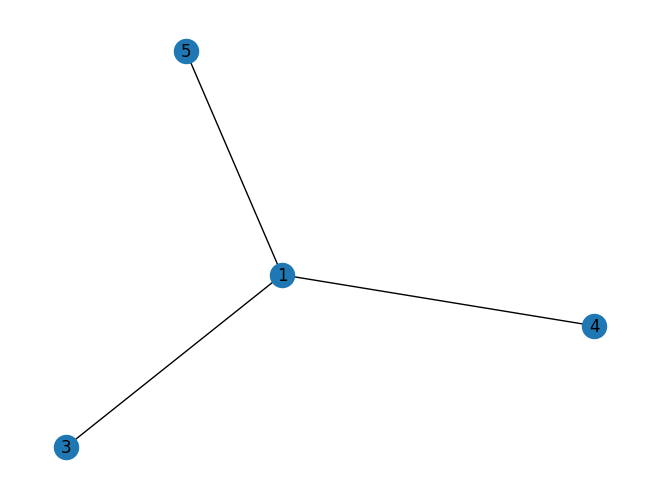

Performing global features query
Done with edge_df: 0.0008835792541503906
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u  v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  1  3     18.23    7.006226               0.095976              0.000009   
1  1  4     51.52   31.981057               0.438098              0.000194   
2  1  5     38.18   27.008424               0.270062              0.000038   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                2                       None                          None  
2                1                       None                          None  
Afer Global query: 
   u  v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  1  3     18.23    7.006226               0.095976              0.000009   


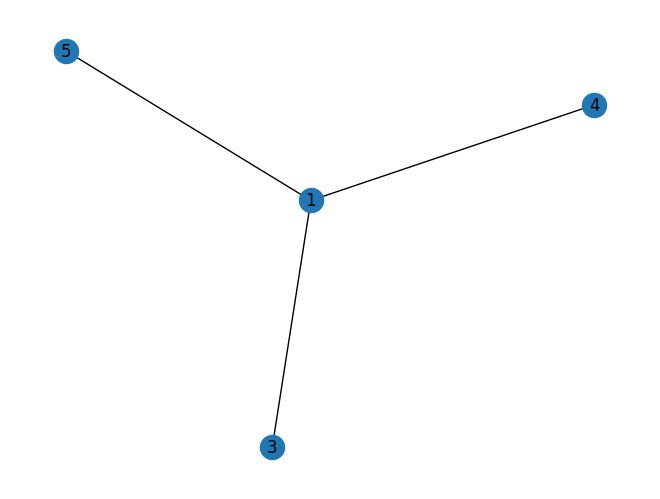

Performing node features query
Done with edge_df: 0.0008599758148193359
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u  v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  1  3     18.23    7.006226               0.095976              0.000009   
1  1  4     51.52   31.981057               0.438098              0.000194   
2  1  5     38.18   27.008424               0.270062              0.000038   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                2                       None                          None   
2                1                       None                          None   

  above_threshold_delete  
0                   None  
1                   True  
2                   None  
Afer Node query: 
   u  v  sk_angle  width_diff  width_diff_percent

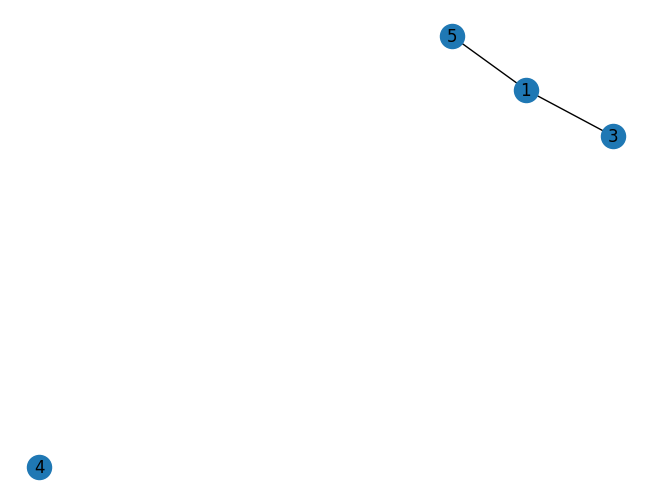

for upstream node 5, winning_node = None, error_branches = [1 3 4]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1439.6098165500885 but max skip distance was 1439.6098165500885
Current node skip distance was 1430.4806768165622 but max skip distance was 1430.4806768165622
Current node skip distance was 1395.1715386565604 but max skip distance was 1395.1715386565604
Current node skip distance was 1744.3375177598848 but max skip distance was 1744.3375177598848
Current node skip distance was 1466.355776664736 but max skip distance was 1466.355776664736
Current node skip distance was 1419.1567072051882 but max skip distance was 1923.9180300989
Current node skip distance was 1419.1157734842918 but max skip distance was 1419.1157734842918
Current node skip distance was 1395.269121022833 but max skip distance was 1395.269121022833
Current node skip distance was 1557.7705577183872 but max skip distance was 1652.2820055877

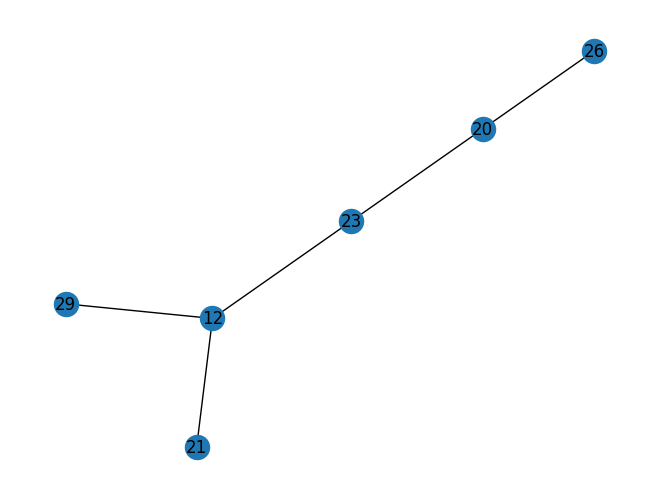

Performing global features query
Done with edge_df: 0.0010173320770263672
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  12  21     52.72   30.497361               0.503277                   0.0   
1  12  23     57.20    1.161105               0.019161                   0.0   
2  12  29     34.74   10.451040               0.172466                   0.0   
3  23  20     53.63   35.917772               0.367722                   0.0   
4  26  20     14.73    9.119640               0.093366                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3       

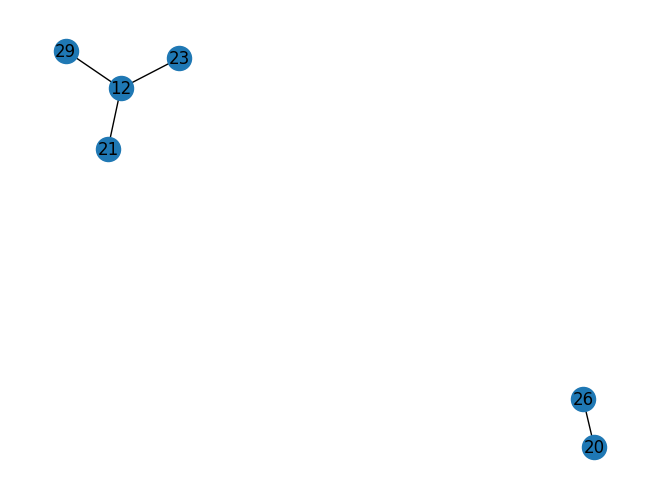

Performing node features query
Done with edge_df: 0.0010793209075927734
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  12  21     52.72   30.497361               0.503277                   0.0   
1  12  23     57.20    1.161105               0.019161                   0.0   
2  12  29     34.74   10.451040               0.172466                   0.0   
3  26  20     14.73    9.119640               0.093366                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                      False                          None   

  above_

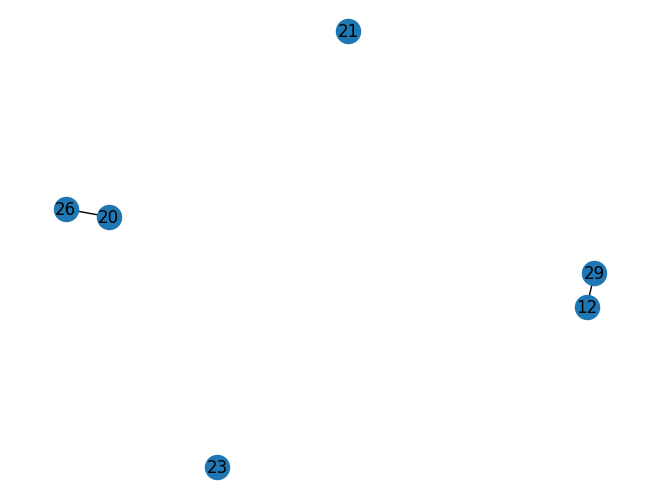

for upstream node 20, winning_node = 26, error_branches = [12 21 23 29]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1546.2290435708915 but max skip distance was 1546.2290435708915
Current node skip distance was 1489.1567938332191 but max skip distance was 1489.1567938332191
Current node skip distance was 1423.9946428662824 but max skip distance was 1423.9946428662824
Current node skip distance was 1818.1260492664478 but max skip distance was 1870.3007499853125
Current node skip distance was 1870.3007499853125 but max skip distance was 1870.3007499853125
Current node skip distance was 1611.6505289229938 but max skip distance was 1611.6505289229938
Current node skip distance was 1548.0332843427977 but max skip distance was 1548.0332843427977
Current node skip distance was 1739.3036704668827 but max skip distance was 1818.1260492664478
branch_match_query = :
(((width_diff < 75) or (width_diff_percent

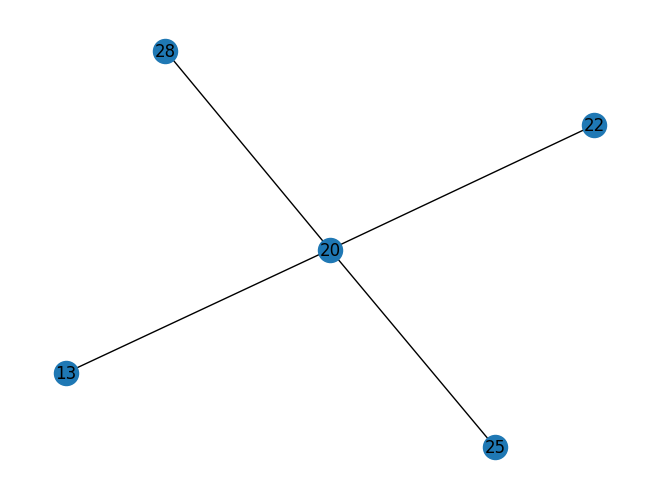

Performing global features query
Done with edge_df: 0.0008368492126464844
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  13  20     20.72   37.088701               0.612148                   0.0   
1  20  22     27.54   20.278856               0.207612                   0.0   
2  20  25     63.33   71.195693               0.728893                   0.0   
3  20  28     13.50   39.756394               0.289279                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

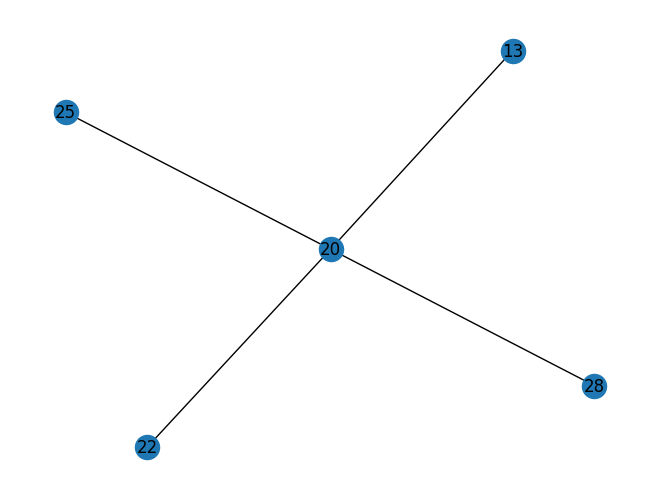

Performing node features query
Done with edge_df: 0.0009119510650634766
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  13  20     20.72   37.088701               0.612148                   0.0   
1  20  22     27.54   20.278856               0.207612                   0.0   
2  20  25     63.33   71.195693               0.728893                   0.0   
3  20  28     13.50   39.756394               0.289279                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

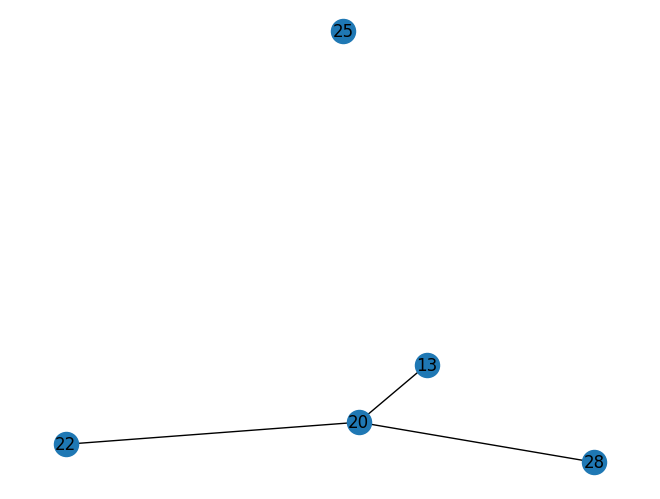

for upstream node 28, winning_node = None, error_branches = [13 20 22 25]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1462.702705562729 but max skip distance was 1462.702705562729
Current node skip distance was 1826.2385344561253 but max skip distance was 1826.2385344561253
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.001752614974975586
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.776070               0.322964              0.000082   
1  10  28     47.78    1.208123               0.008714              0.000000   
2  10  30     91.23   19.656244               0.124173              0.000000   
3  16 

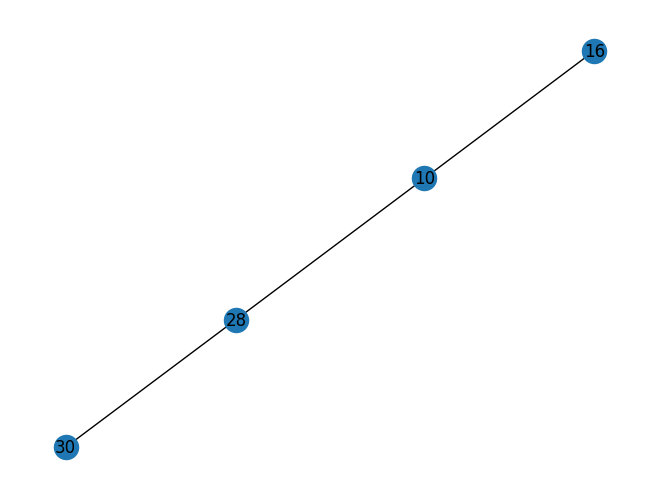

Performing global features query
Done with edge_df: 0.0011706352233886719
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.776070               0.322964              0.000082   
1  10  28     47.78    1.208123               0.008714              0.000000   
2  28  30     43.46   20.864367               0.131805              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                9                      False                          None  
1                0                       True                          None  
2                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.776070               0.322964              

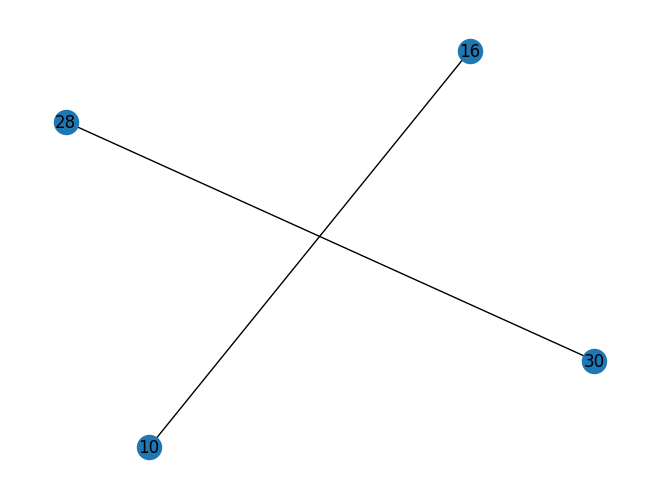

Performing node features query
Done with edge_df: 0.0007996559143066406
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.776070               0.322964              0.000082   
1  28  30     43.46   20.864367               0.131805              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                9                      False                          None   
1                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  10  16     20.86   44.776070               0.322964              0.000082   
1  28  30     43.46   20.864367               0.131805             

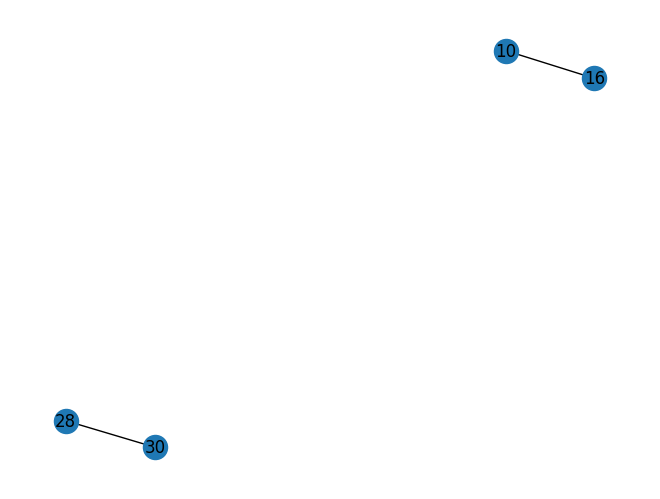

for upstream node 30, winning_node = 28, error_branches = [10 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (137.43288091205204) less than width_min(250)
Current node skip distance was 1502.8179992499754 but max skip distance was 1502.8179992499754
Current node skip distance was 1509.1534886991378 but max skip distance was 1530.915878311781
Current node skip distance was 1608.7992850545759 but max skip distance was 1826.2385344561253
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0028083324432373047
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  30     77.08   66.769260               0.729496                   0.0   
1  27  32     25.52    9.331151               0

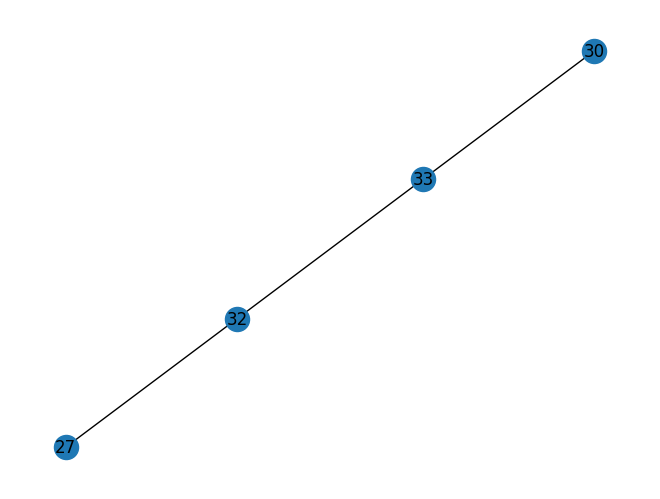

Performing global features query
Done with edge_df: 0.0008943080902099609
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  32     25.52    9.331151               0.101949                   0.0   
1  30  33     47.52   52.185420               0.491796                   0.0   
2  32  33     12.61   23.914991               0.225375                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  32     25.52    9.331151               0.101949              

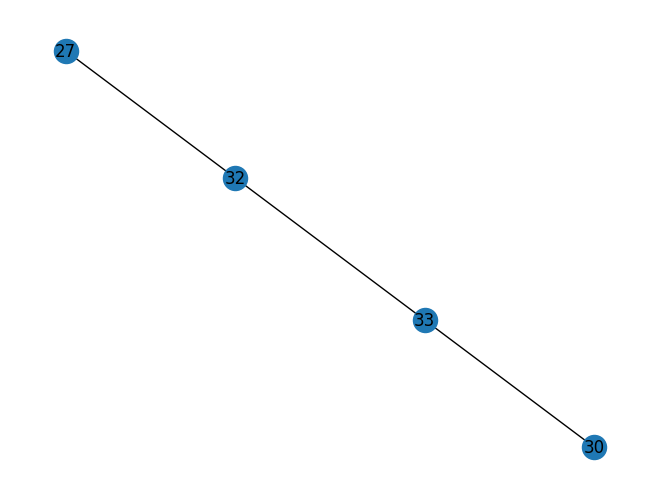

Performing node features query
Done with edge_df: 0.001795053482055664
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  27  32     25.52    9.331151               0.101949                   0.0   
1  30  33     47.52   52.185420               0.491796                   0.0   
2  32  33     12.61   23.914991               0.225375                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   True  
2                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_dif

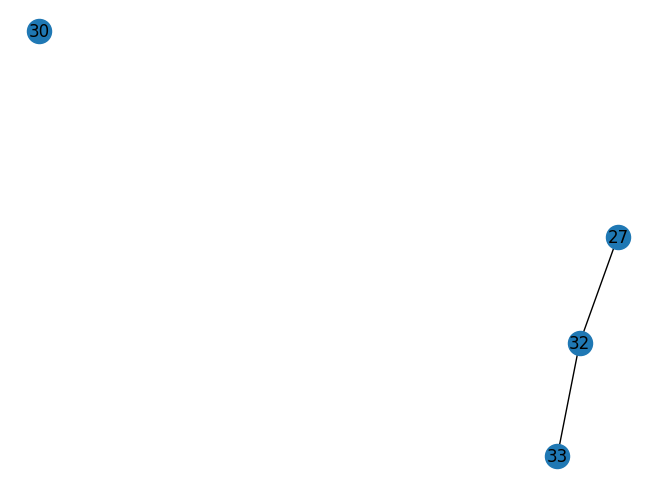

for upstream node 33, winning_node = None, error_branches = [27 30 32]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1737.8473501701521 but max skip distance was 1737.8473501701521
Current node skip distance was 1530.915878311781 but max skip distance was 1530.915878311781
Current node skip distance was 1663.7272311384152 but max skip distance was 1663.7272311384152
Current node skip distance was 1430.495890861237 but max skip distance was 1662.7710035409164
Current node skip distance was 1497.1217798472458 but max skip distance was 1663.7272311384152
Current node skip distance was 1438.787336903817 but max skip distance was 1438.787336903817
Current node skip distance was 1709.818301310424 but max skip distance was 1737.8473501701521
Current node skip distance was 1459.4197789215646 but max skip distance was 2141.3451010899726
Current node skip distance was 1903.2530417833777 but max skip distance was 1903.25304

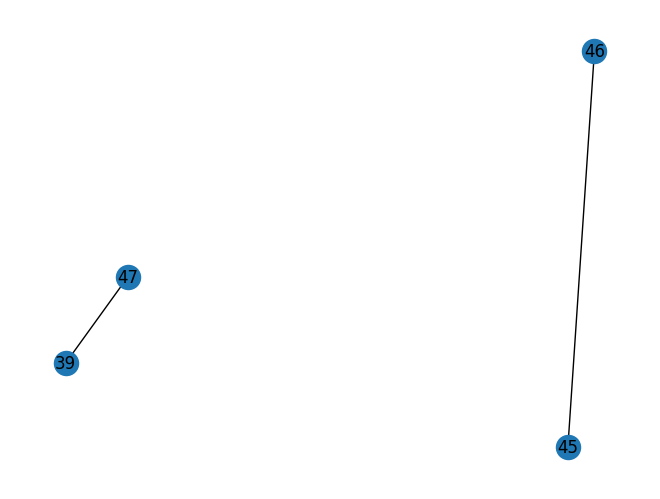

Performing global features query
Done with edge_df: 0.0008754730224609375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    2.170513               0.027368                   0.0   
1  45  46     17.97   23.495907               0.117317                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  
0                0                       False                          False  
1                0                       False                          False  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    2.170513               0.027368                   0.0   
1  45  46     17.97   23.495907               0.117317                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_pa

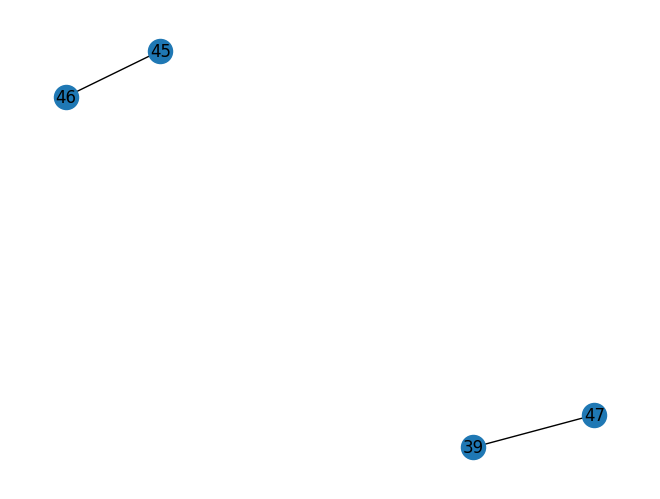

Performing node features query
Done with edge_df: 0.0007901191711425781
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    2.170513               0.027368                   0.0   
1  45  46     17.97   23.495907               0.117317                   0.0   

   n_synapses_diff  definite_partner_sk_delete  definite_partner_width_delete  \
0                0                       False                          False   
1                0                       False                          False   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  39  47     12.03    2.170513               0.027368                   0.0   
1  45  46     17.97   23.495907               0.117317       

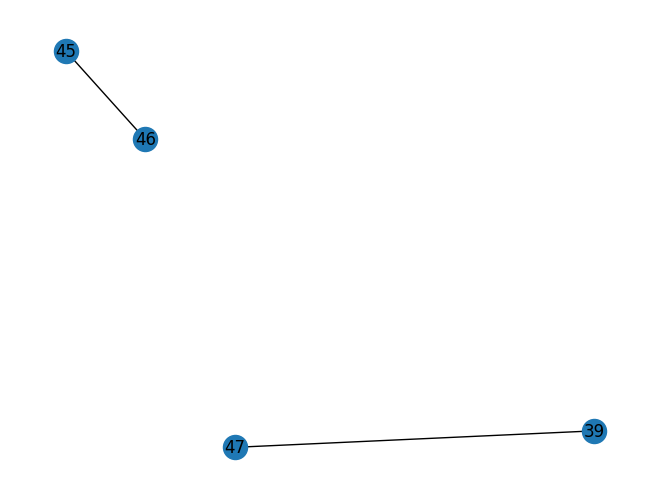

for upstream node 46, winning_node = 45, error_branches = [39 47]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (176.78073002801082) less than width_min(250)
Current node skip distance was 1506.165582874341 but max skip distance was 1513.7313878209764
Current node skip distance was 1450.4508458210582 but max skip distance was 1450.4508458210582
Current node skip distance was 2028.9408259759957 but max skip distance was 2028.9408259759957
Current node skip distance was 1874.4952927129884 but max skip distance was 2028.9408259759957
Current node skip distance was 1915.3718706738891 but max skip distance was 2029.9498218166473
Current node skip distance was 1440.1882868033294 but max skip distance was 1468.5371695391739
Current node skip distance was 1513.7313878209764 but max skip distance was 1513.7313878209764
Current node skip distance was 1393.7589706183728 but max skip distance was 1393.7589706183728
Current node skip distance was 1468.5371695391739 but ma

In [55]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [56]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)

No skeletons to stack so returning empty list

Working on compartment basal---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 170.97, 'soma_angle_min': 20.41}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 0, 'soma_angle_max': None, 'soma_angle_min': None}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 80.63, 'soma_angle_min': 80.63}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 170.97, 'soma_angle_min': 20.41}


# Saving off the autoproofread neuron

In [57]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

Total time for soma meshes compression = 0.1861734390258789
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.15056967735290527
Total time for limb_meshes compression = 0.51235032081604
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 1.7258734703063965
Cleared mesh: <trimesh.Trimesh(vertices.shape=(6494, 3), faces.shape=(15575, 3))>:140357219643600
Cleared mesh: <trimesh.Trimesh(vertices.shape=(3256, 3), faces.shape=(5810, 3))>:140357219643888
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2064, 3), faces.shape=(4789, 3))>:140357219645136
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2022, 3), faces.shape=(4628, 3))>:140357219646384
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1922, 3), faces.shape=(4396, 3))>:140359500800112
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1089, 3), faces.shape=(2556, 3))>:140357219661184
Cleared mesh: <trimesh.Trimesh(vertic

'864691135510518224_auto_proof.pbz2'

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [ ]:
nviz.plot_compartments(neuron_obj_proof)